In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install umap-learn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import os
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Configuración de hiperparámetros
time_window = 24  # Ventana de tiempo inicial, se ajusta para días, semanas o meses
input_shape = (time_window, 10)  # W x 10 para las 10 variables seleccionadas

# Creación del modelo DCAE
def create_dcae(input_shape):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv1D(64, kernel_size=10, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(32, kernel_size=5, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(12, kernel_size=5, activation='relu', padding='same')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Flatten()(x)
    encoded = Dense(60, activation='linear')(x)

    # Decoder
    x = Dense((time_window // 8) * 12, activation='relu')(encoded)
    x = Reshape((time_window // 8, 12))(x)
    x = Conv1D(12, kernel_size=5, activation='relu', padding='same')(x)
    x = UpSampling1D(size=2)(x)
    x = Conv1D(32, kernel_size=5, activation='relu', padding='same')(x)
    x = UpSampling1D(size=2)(x)
    x = Conv1D(64, kernel_size=10, activation='relu', padding='same')(x)
    x = UpSampling1D(size=2)(x)
    decoded = Conv1D(10, kernel_size=10, activation='linear', padding='same')(x)

    model = Model(inputs=input_layer, outputs=decoded)
    return model


In [ ]:
# Compilación del modelo
model = create_dcae(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 24, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 24, 64)              │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 12, 32)              │          10,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 6, 12)               │           1,932 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 3, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           2,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           2,196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 3, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 3, 12)               │             732 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_3 (UpSampling1D)       │ (None, 6, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 6, 32)               │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_4 (UpSampling1D)       │ (None, 12, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 12, 64)              │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling1d_5 (UpSampling1D)       │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 24, 10)              │           6,410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,722 (205.95 KB)

 Trainable params: 52,722 (205.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Función para preprocesar los datos (imputación y normalización)
def preprocess_data(data, time_window):
    # Imputación de valores faltantes con la media de cada columna
    imputer = SimpleImputer(strategy='mean')
    data = imputer.fit_transform(data)

    # Normalización de los datos
    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # División en secuencias de longitud time_window
    sequences = []
    for i in range(len(data) - time_window + 1):
        sequences.append(data[i:i + time_window])

    sequences = np.array(sequences)

    # Verificación final de NaN o inf en sequences
    if np.isnan(sequences).sum() > 0 or np.isinf(sequences).sum() > 0:
        print("Error: Hay valores NaN o inf en los datos procesados.")

    return sequences, scaler

# Cargar y procesar los datos de calidad del aire desde el archivo CSV
data_path = '/content/drive/MyDrive/Data_Beijing/Data_Aotizhongxin.csv'
air_quality_data = pd.read_csv(data_path)

# Filtrar solo las columnas necesarias
features = ['PM2_5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
air_quality_data = air_quality_data[features]

# Preprocesamiento
sequences, scaler = preprocess_data(air_quality_data, time_window)


In [ ]:
# Número de filas antes del procesamiento
print("Número de filas antes del procesamiento:", air_quality_data.shape[0])

# Número de filas después del procesamiento
print("Número de secuencias generadas después del procesamiento:", sequences.shape[0])



Número de filas antes del procesamiento: 35064
Número de secuencias generadas después del procesamiento: 35041


In [ ]:
# Entrenamiento del modelo
history = model.fit(sequences, sequences, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.4003 - val_loss: 0.2397
Epoch 2/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 0.2454 - val_loss: 0.2022
Epoch 3/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.2115 - val_loss: 0.1909
Epoch 4/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.1969 - val_loss: 0.1826
Epoch 5/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.1864 - val_loss: 0.1802
Epoch 6/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.1777 - val_loss: 0.1719
Epoch 7/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.1731 - val_loss: 0.1608
Epoch 8/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.1679 - val_loss: 0.1557
Epoch 9/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 0.1640 - val_loss: 0.1527
Epoch 10/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.1602 - val_loss: 0.1520
Epoch 11/50
876/876 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.1580 - val_loss: 0.1485
Epoch 12/50
876/876 ━━━━━━━━━━

In [ ]:
# Guardar el modelo en un archivo
model.save('/content/drive/MyDrive/Data_Beijing/Model/modelo_DCAE.h5')

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


In [ ]:
# Historial de entrenamiento
print("Métricas disponibles en history.history:", history.history.keys())

# Pérdida de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Mostrar última pérdida de entrenamiento y validación
print("Pérdida final de entrenamiento:", train_loss[-1])
print("Pérdida final de validación:", val_loss[-1])


Métricas disponibles en history.history: dict_keys(['loss', 'val_loss'])
Pérdida final de entrenamiento: 0.13063666224479675
Pérdida final de validación: 0.1279112547636032


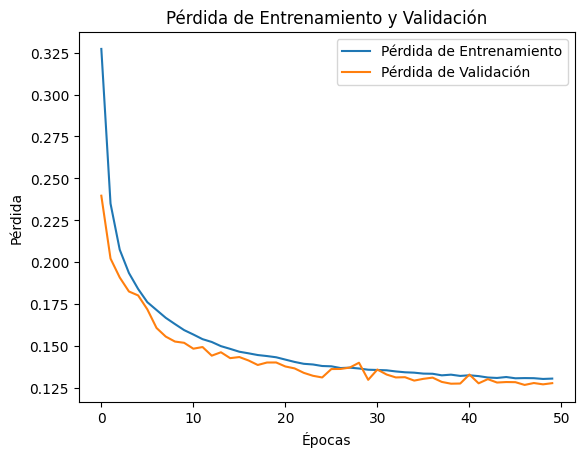

In [ ]:
import matplotlib.pyplot as plt

# Pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()


In [ ]:
# Reducción de dimensionalidad y visualización
def visualize_encoded_data(encoded_data):
    """
    Aplica métodos de reducción de dimensionalidad: PCA, t-SNE y UMAP.
    """
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    umap_reducer = umap.UMAP(n_components=2)

    pca_result = pca.fit_transform(encoded_data)
    tsne_result = tsne.fit_transform(encoded_data)
    umap_result = umap_reducer.fit_transform(encoded_data)

    return pca_result, tsne_result, umap_result

# Extraer características del encoder para la reducción de dimensionalidad
encoder = Model(inputs=model.input, outputs=model.get_layer('dense_2').output)
encoded_data = encoder.predict(sequences)

# Reducción de dimensionalidad
pca_result, tsne_result, umap_result = visualize_encoded_data(encoded_data)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# Crear la carpeta "/content/drive/MyDrive/Data_Beijing/Vector" si no existe
output_path = '/content/drive/MyDrive/Data_Beijing/Vector'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Guardar los resultados de las reducciones de dimensionalidad en CSV
np.savetxt(os.path.join(output_path, 'pca_result.csv'), pca_result, delimiter=',', header="PCA1,PCA2", comments='')
np.savetxt(os.path.join(output_path, 'tsne_result.csv'), tsne_result, delimiter=',', header="tSNE1,tSNE2", comments='')
np.savetxt(os.path.join(output_path, 'umap_result.csv'), umap_result, delimiter=',', header="UMAP1,UMAP2", comments='')

# Guardar las características codificadas en un CSV
np.savetxt(os.path.join(output_path, 'encoded_features.csv'), encoded_data, delimiter=',', header="Feature_" + ','.join(map(str, range(encoded_data.shape[1]))), comments='')

# Visualización de PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='purple', label='PCA')
plt.title('PCA Result')
plt.savefig(os.path.join(output_path, 'pca_plot.png'))
plt.show()

# Visualización de t-SNE
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', label='t-SNE')
plt.title('t-SNE Result')
plt.savefig(os.path.join(output_path, 'tsne_plot.png'))
plt.show()

# Visualización de UMAP
plt.scatter(umap_result[:, 0], umap_result[:, 1], c='grey', label='UMAP')
plt.title('UMAP Result')
plt.savefig(os.path.join(output_path, 'umap_plot.png'))
plt.show()


NameError: name 'os' is not defined

In [ ]:
# Contar las filas de los archivos guardados
files = ['pca_result.csv', 'tsne_result.csv', 'umap_result.csv', 'encoded_features.csv']

for file in files:
    file_path = os.path.join(output_path, file)
    num_rows = sum(1 for line in open(file_path)) - 1
    print(f'{file} tiene {num_rows} filas')

pca_result.csv tiene 35041 filas
tsne_result.csv tiene 35041 filas
umap_result.csv tiene 35041 filas
encoded_features.csv tiene 35041 filas


In [ ]:
# Cargar el archivo CSV de características codificadas
encoded_features_df = pd.read_csv(os.path.join(output_path, 'encoded_features.csv'))

# Mostrar los primeros 5 registros (filas)
print(encoded_features_df.head())

   Feature_0         1         2         3         4         5         6  \
0   1.165474  0.538913  0.137600  0.383003 -0.299543  1.236833 -0.374990   
1   1.203435  0.445417  0.108765  0.341265 -0.330928  1.265532 -0.413119   
2   1.204804  0.392669  0.144654  0.241709 -0.274667  1.339604 -0.448626   
3   1.216311  0.394087  0.193428  0.130689 -0.230893  1.455966 -0.456655   
4   1.158893  0.432966  0.303024 -0.025971 -0.143738  1.625658 -0.434658   

          7         8         9  ...        50        51        52        53  \
0 -0.313131 -0.022845  1.441883  ...  0.474054  0.150247 -0.069993  0.394857   
1 -0.246079 -0.071366  1.471406  ...  0.479617  0.077568 -0.073263  0.337341   
2 -0.114915 -0.105917  1.462914  ...  0.511761 -0.017437 -0.119485  0.223062   
3  0.027322 -0.123449  1.434978  ...  0.533646 -0.114502 -0.167696  0.108652   
4  0.155385 -0.120513  1.380142  ...  0.566575 -0.161034 -0.241645 -0.008801   

         54        55        56        57        58        59 

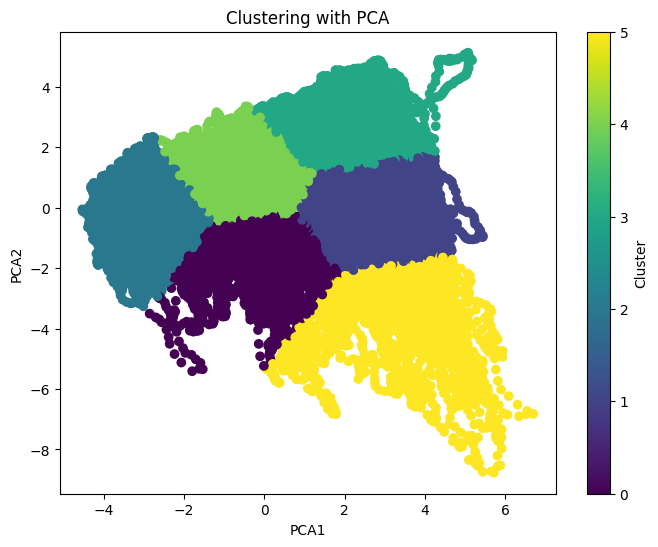

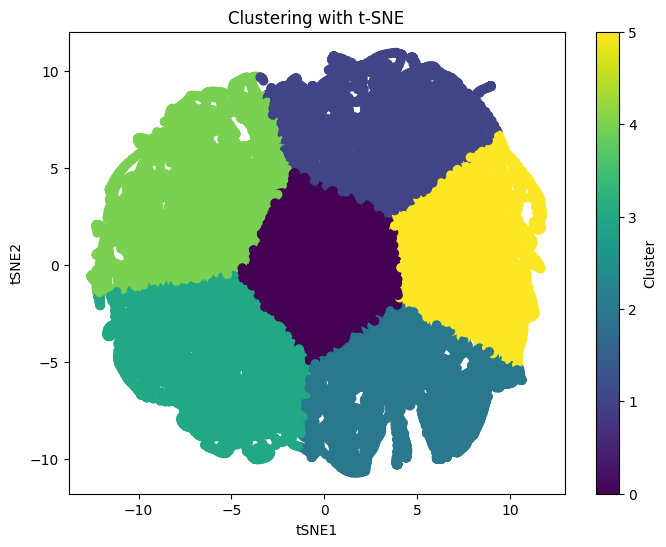

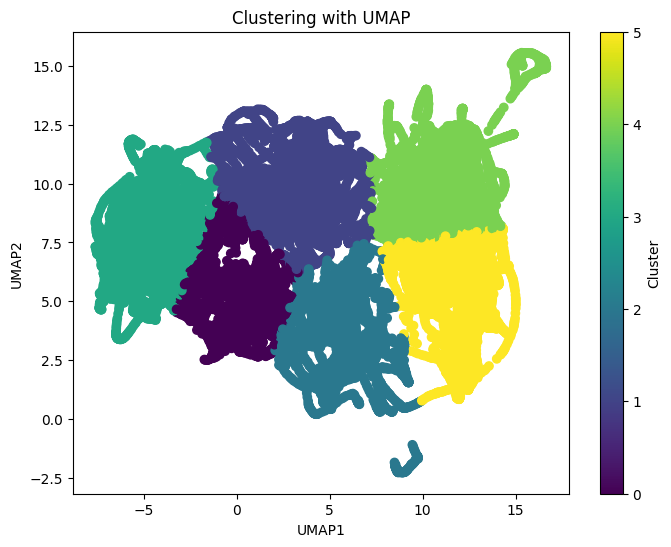

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear la carpeta si no existe
output_path = '/content/drive/MyDrive/Data_Beijing/Vector'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Definir el número de clusters
n_clusters = 6

# Aplicar KMeans clustering a los resultados de PCA, t-SNE y UMAP
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42).fit(pca_result)
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42).fit(tsne_result)
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42).fit(umap_result)

# Obtener las etiquetas de los clusters
labels_pca = kmeans_pca.labels_
labels_tsne = kmeans_tsne.labels_
labels_umap = kmeans_umap.labels_

# Visualización de PCA con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_pca, cmap='viridis', label='PCA Clusters')
plt.title('Clustering with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(output_path, 'pca_clusters.png'))
plt.show()

# Visualización de t-SNE con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels_tsne, cmap='viridis', label='t-SNE Clusters')
plt.title('Clustering with t-SNE')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(output_path, 'tsne_clusters.png'))
plt.show()

# Visualización de UMAP con los clusters
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=labels_umap, cmap='viridis', label='UMAP Clusters')
plt.title('Clustering with UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Cluster')
plt.savefig(os.path.join(output_path, 'umap_clusters.png'))
plt.show()

# Guardar los resultados de los clusters en CSV
np.savetxt(os.path.join(output_path, 'pca_clusters.csv'), np.column_stack([pca_result, labels_pca]), delimiter=',', header="PCA1,PCA2,Cluster", comments='')
np.savetxt(os.path.join(output_path, 'tsne_clusters.csv'), np.column_stack([tsne_result, labels_tsne]), delimiter=',', header="tSNE1,tSNE2,Cluster", comments='')
np.savetxt(os.path.join(output_path, 'umap_clusters.csv'), np.column_stack([umap_result, labels_umap]), delimiter=',', header="UMAP1,UMAP2,Cluster", comments='')
